In [29]:
import numpy as np
import healpy as hp
import astropy.units as u
import rubin_sim.maf.metrics as metrics
import rubin_sim.maf.slicers as slicers
import rubin_sim.maf.plots as plots
import rubin_sim.maf.maps as maps
import rubin_sim.maf.metricBundles as mb
import rubin_sim.maf as maf
import matplotlib.pylab as plt
%matplotlib inline
import copy
import pandas as pd

In [8]:
filename = 'baseline_v2.2_10yrs.db'
runname = filename.replace('.db', '')

In [4]:
nside = 64
healpixslicer = slicers.HealpixSlicer(nside=nside, useCache=True)
parallaxStacker = maf.ParallaxFactorStacker()

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


In [9]:
summary1 = [
        metrics.AreaSummaryMetric(
            area=18000,
            reduce_func=np.median,
            decreasing=False,
            metricName="Median Parallax Uncert (18k)",
        )]

summary2 = [
        metrics.AreaSummaryMetric(
            area=18000,
            reduce_func=np.median,
            decreasing=False,
            metricName="Median Proper Motion Uncert (18k)",
        )
    ]

bundleList = []
rmags = np.arange(20, 25)
sql = ''
for rmag in rmags:
    metric = metrics.ParallaxMetric(
        metricName="Parallax Uncert @ %.1f" % (rmag),
        rmag=rmag,
        normalize=False,
    )
    bundle = mb.MetricBundle(
        metric,
        healpixslicer,
        sql,
        stackerList=[parallaxStacker],
        summaryMetrics=summary1,runName=runname
    )
    bundleList.append(bundle)
    
    metric = metrics.ProperMotionMetric(
            metricName="Proper Motion Uncert @ %.1f" % rmag,
            rmag=rmag,
            normalize=False,
        )
    bundle = mb.MetricBundle(
        metric,
        healpixslicer,
        sql,
        summaryMetrics=summary2,runName=runname
    )
    bundleList.append(bundle)



In [11]:
bg = mb.MetricBundleGroup(bundleList, filename, outDir='temp')
bg.runAll()


Querying table None with no constraint for columns ['filter', 'fieldDec', 'rotSkyPos', 'observationStartMJD', 'fieldRA', 'seeingFwhmGeom', 'fiveSigmaDepth'].
Found 2075598 visits
Running:  ['baseline_v2_2_10yrs_Parallax_Uncert_@_20_0_HEAL', 'baseline_v2_2_10yrs_Proper_Motion_Uncert_@_20_0_HEAL', 'baseline_v2_2_10yrs_Parallax_Uncert_@_21_0_HEAL', 'baseline_v2_2_10yrs_Proper_Motion_Uncert_@_21_0_HEAL', 'baseline_v2_2_10yrs_Parallax_Uncert_@_22_0_HEAL', 'baseline_v2_2_10yrs_Proper_Motion_Uncert_@_22_0_HEAL', 'baseline_v2_2_10yrs_Parallax_Uncert_@_23_0_HEAL', 'baseline_v2_2_10yrs_Proper_Motion_Uncert_@_23_0_HEAL', 'baseline_v2_2_10yrs_Parallax_Uncert_@_24_0_HEAL', 'baseline_v2_2_10yrs_Proper_Motion_Uncert_@_24_0_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


In [16]:
bundleList[1].summaryValues

{'Median Proper Motion Uncert (18k)': 0.16129913538773014}

In [17]:
parallax = [bl.summaryValues['Median Parallax Uncert (18k)'] for bl in bundleList[::2]]
pm = [bl.summaryValues['Median Proper Motion Uncert (18k)'] for bl in bundleList[1::2]]

In [15]:
parallax

[0.6322382532981748,
 0.9161860205639609,
 1.6720379242380117,
 3.6969474374975113,
 9.003032944730576]

In [18]:
pm

[0.16129913538773014,
 0.2272416487567249,
 0.40366407705654617,
 0.8863057255898543,
 2.156373356829648]

Text(0, 0.5, 'Astrometric Precision (mas or mas/yr)')

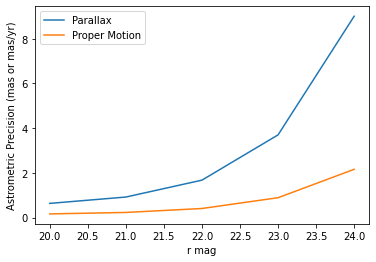

In [26]:
plt.plot(rmags, parallax, label='Parallax')
plt.plot(rmags, pm, label='Proper Motion')
leg = plt.legend()
plt.xlabel('r mag')
plt.ylabel('Astrometric Precision (mas or mas/yr)')

In [28]:
np.array(parallax)/np.array(pm)

array([3.919663  , 4.03176982, 4.1421519 , 4.17118758, 4.17508077])

In [31]:
df = pd.DataFrame()
df['rmag'] = rmags
df['Parallax'] = parallax
df['Proper Motion'] = pm
df

,rmag,Parallax,Proper Motion
0,20,0.632238,0.161299
1,21,0.916186,0.227242
2,22,1.672038,0.403664
3,23,3.696947,0.886306
4,24,9.003033,2.156373
